In [ ]:
# @title import libraries
# Importing NumPy library for numerical operations
import numpy as np
# Importing Pandas library for data manipulation and analysis
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from scipy.stats import linregress
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Importing warnings module to handle warnings
import warnings
# Filtering out warnings to ignore them
warnings.filterwarnings("ignore")


#set  plot style
plt.style.use('Solarize_Light2')

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/projects/Kiosk_Sales.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              65 non-null     object 
 1   Vat %              65 non-null     object 
 2   Selling Price      65 non-null     float64
 3   Quantity Sold      65 non-null     int64  
 4   Net Selling Price  65 non-null     float64
 5   Sales Tax          65 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.2+ KB


**Definitions and Explanations**
0. **Month**:
Represents the month of the year in which the transactions occur (e.g., January, February, etc.).

1. **VAT %(Value Added Tax Percentage)**:
The percentage rate of VAT applicable to the Selling Price. This is a regulatory tax applied to the sale of goods or services.

2. **Selling Price (Gross Price)**:
The total amount received from customers for each item sold, including VAT.

3. **Quantity Sold**:
The total number of items sold during the specified month.

4. **Net Selling Price (Excluding VAT)**:
The portion of the Selling Price that excludes VAT. This is the true revenue from selling the items before tax obligations.

  *Formula: Net Selling Price = Selling Price/(1+VAT/100)*

5. **Sales Tax** :
The tax amount derived from the Selling Price, representing the VAT portion.

  *Formula: Sales Tax= Selling Price - Net Selling Price*




In [ ]:
df.tail(20)

,Month,Vat %,Selling Price,Quantity Sold,Net Selling Price,Sales Tax
45,10 October,0,87431.35,18004,87431.35,0.00
46,10 October,13,11575.45,10289,10243.76,1331.69
47,10 October,24,6796.35,5797,5480.93,1315.42
48,10 October,6,65.10,79,61.42,3.68
49,10 October,Total,105868.25,34169,103217.45,2650.80
50,11 November,0,87692.30,16837,87692.30,0.00
51,11 November,13,9594.30,8687,8490.53,1103.77
52,11 November,24,6638.95,5511,5353.99,1284.96
53,11 November,6,49.70,48,46.89,2.81
54,11 November,Total,103975.25,31083,101583.71,2391.54


* *VAT 0%:* Cigarettes and smoking-related items
* *VAT 6%:* Personal protective equipment during COVID-19
* *VAT 13%:* Water and non-alcoholic beverages such as juices, sodas, and energy drinks
* *VAT 24%:* Alcoholic drinks, snacks, and ice cream

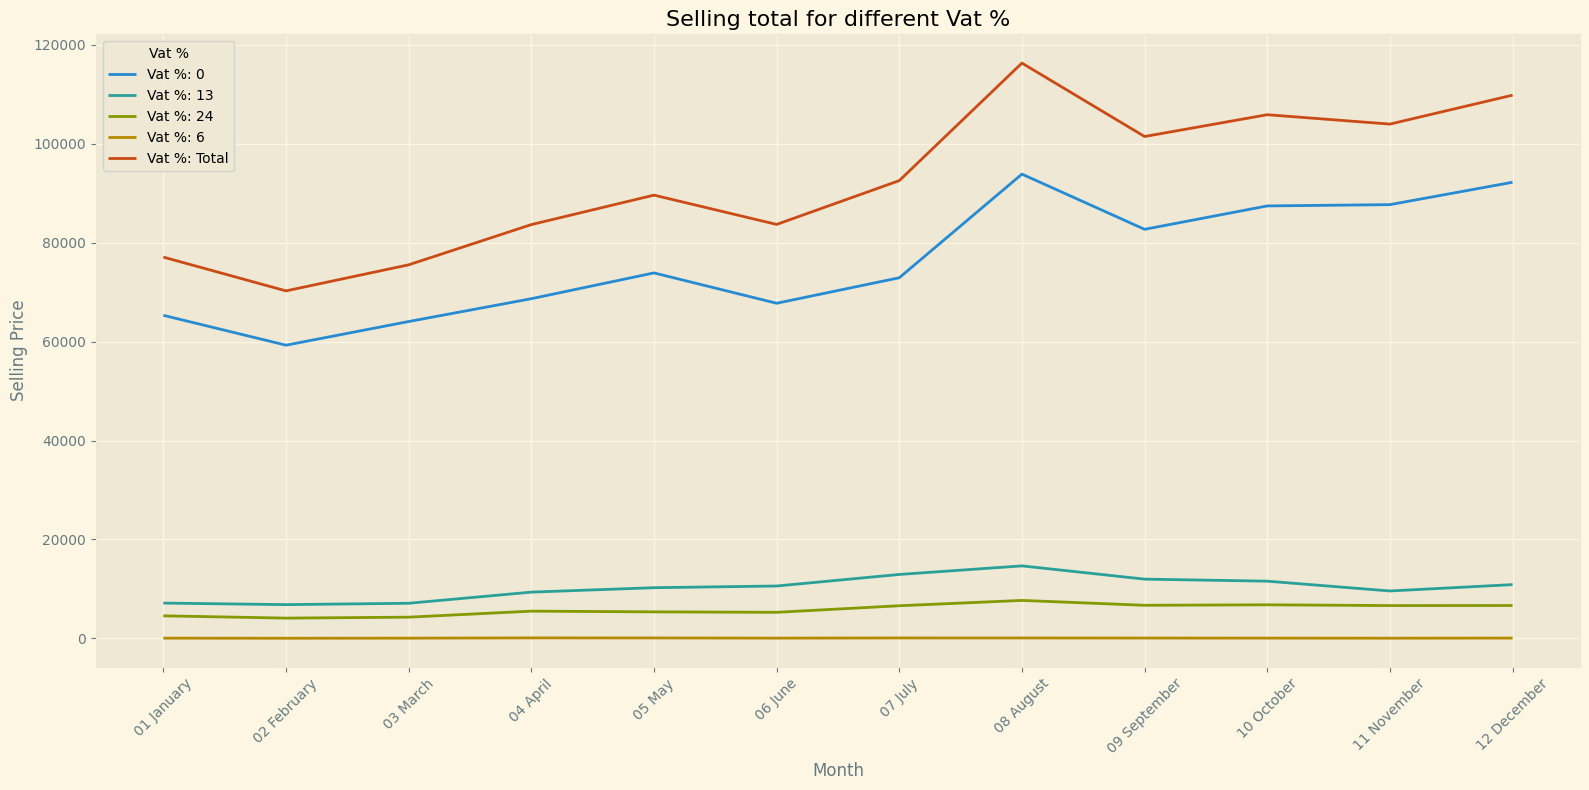

In [ ]:
plt.figure(figsize=(16, 8))

# Loop through unique Vat % values
for x in df["Vat %"].unique():
    # Filter DataFrame for the current Vat %
    filtered_df = df[df["Vat %"] == x]

    # Plot the line for the current Vat %
    sns.lineplot(data=filtered_df[0:12], x='Month', y='Selling Price', label=f"Vat %: {x}")

# Format the plot
plt.xticks(rotation=45)
plt.title("Selling total for different Vat %")
plt.legend(title="Vat %")
plt.tight_layout()
plt.show()

As we can see, the total sales for cigarettes and smoking-related items account for over 80% of the share. This makes it difficult to observe changes in the sales totals of the other categories. Therefore, let's plot the data again, focusing only on the remaining three categories.

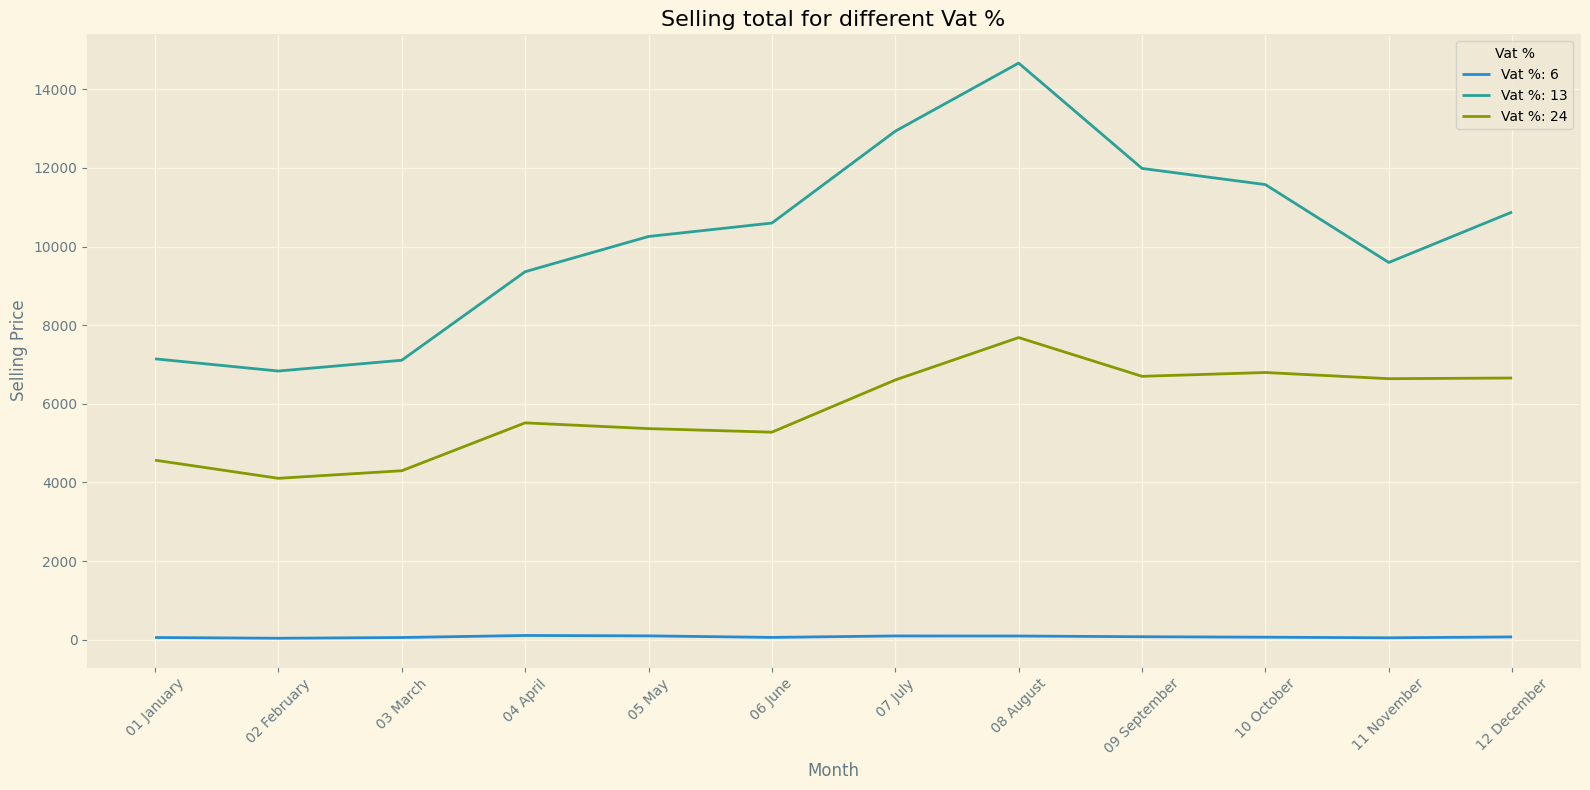

In [ ]:
plt.figure(figsize=(16, 8))

# Loop through unique Vat % values
for x in (6,13,24):
    # Filter DataFrame for the current Vat %
    filtered_df = df[df["Vat %"] == x]

    # Plot the line for the current Vat %
    sns.lineplot(data=filtered_df[0:12], x='Month', y='Selling Price', label=f"Vat %: {x}")

# Format the plot
plt.xticks(rotation=45)
plt.title("Selling total for different Vat %")
plt.legend(title="Vat %")
plt.tight_layout()
plt.show()

The VAT 6% category for personal protective equipment during COVID-19 shows minimal changes throughout the year, as it was no longer mandatory to use such items in 2022.

The VAT 13% category for water and non-alcoholic beverages experienced a significant increase in sales. This can be attributed to the improving weather in Greece, which encourages people to spend more time outdoors. Additionally, in August, a local festival takes place near the kiosk for 3-4 days, causing a notable spike in sales across all products, especially water and non-alcoholic drinks.

The VAT 24% category also saw an increase, though less pronounced. While ice cream sales rose, there was a decline in sales of temperature-sensitive products like chocolates.

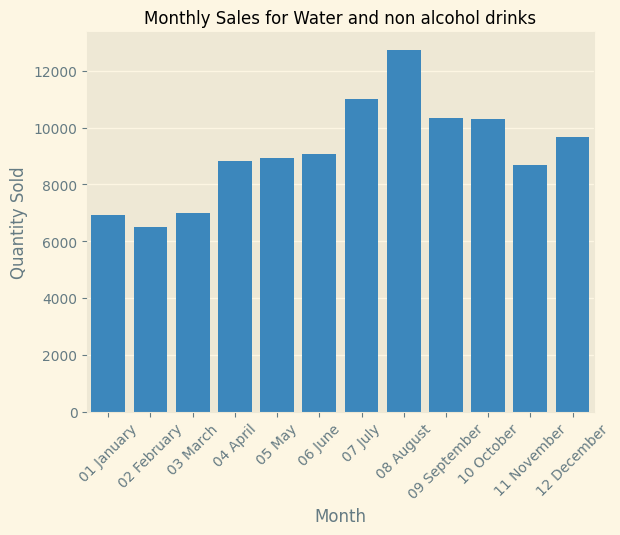

In [ ]:
filtered_df = df[(df['Vat %'] == 13) & (df['Month'] != 'Grand Total')]


sns.barplot(data=filtered_df, x='Month', y='Quantity Sold')

# Customize the chart
plt.title('Monthly Sales for Water and non alcohol drinks', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)

# Show the plot
plt.show()

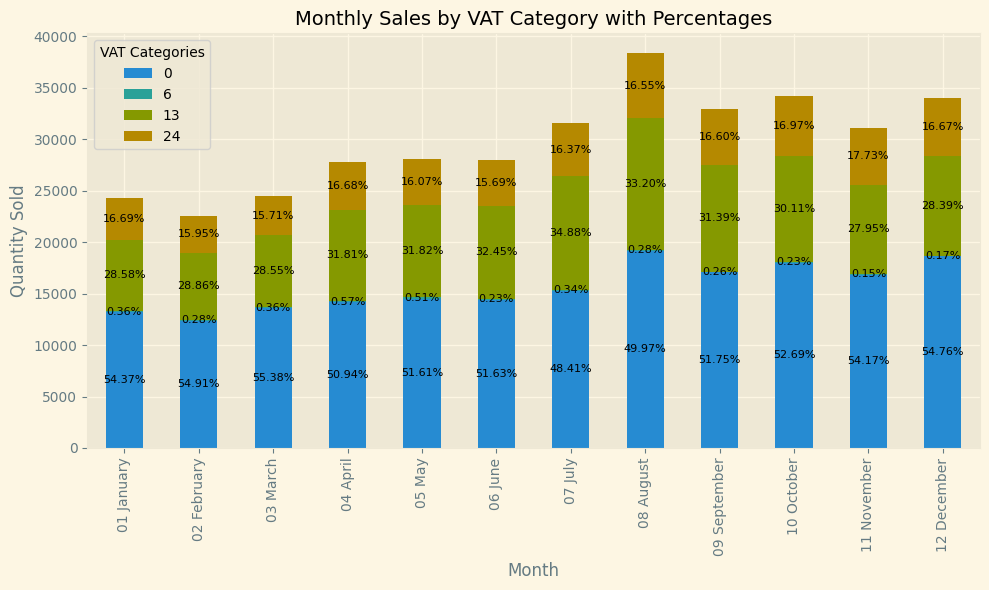

In [ ]:
# Filter out the 'Total' rows
filtered_df = df[(df['Vat %'] != 'Total') & (df['Month'] != 'Grand Total')]


# Pivot table to reshape data for plotting
pivot = filtered_df.pivot(index='Month', columns='Vat %', values='Quantity Sold')

# Plot a stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Annotate each bar segment with percentages
for i, month in enumerate(pivot.index):
    total = pivot.loc[month].sum()  # Get the total for the month
    bottom = 0  # Start stacking from the bottom
    for category in pivot.columns:
        value = pivot.loc[month, category]
        percentage = (value / total) * 100
        # Add annotation in the middle of the segment
        ax.text(i, bottom + value / 2, f'{percentage:.2f}%', ha='center', va='center', fontsize=8)
        bottom += value

# Customize the chart
plt.title('Monthly Sales by VAT Category with Percentages', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='VAT Categories')
plt.tight_layout()

# Show the plot
plt.show()

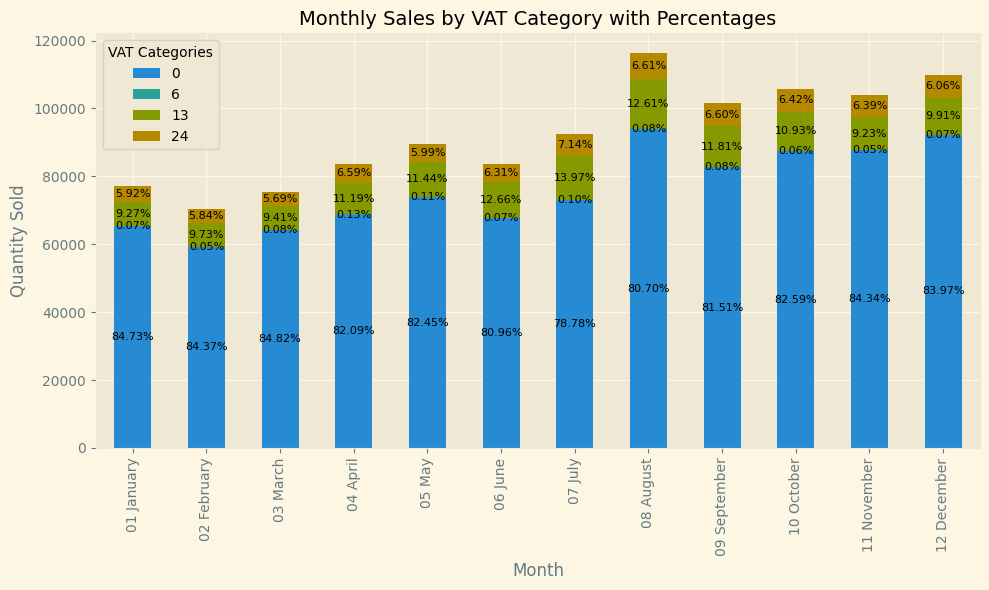

In [ ]:
# Filter out the 'Total' rows
filtered_df2 = df[(df['Vat %'] != 'Total') & (df['Month'] != 'Grand Total')]


# Pivot table to reshape data for plotting
pivot2 = filtered_df2.pivot(index='Month', columns='Vat %', values='Selling Price')

# Plot a stacked bar chart
ax = pivot2.plot(kind='bar', stacked=True, figsize=(10, 6))

# Annotate each bar segment with percentages
for i, month in enumerate(pivot2.index):
    total = pivot2.loc[month].sum()  # Get the total for the month
    bottom = 0  # Start stacking from the bottom
    for category in pivot2.columns:
        value = pivot2.loc[month, category]
        percentage = (value / total) * 100
        # Add annotation in the middle of the segment
        ax.text(i, bottom + value / 2, f'{percentage:.2f}%', ha='center', va='center', fontsize=8)
        bottom += value

# Customize the chart
plt.title('Monthly Sales by VAT Category with Percentages', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='VAT Categories')
plt.tight_layout()

# Show the plot
plt.show()

We can observe that cigarettes and smoking-related items consistently account for over 50% of sales during all months except for the two hottest months of the year, July and August. During these months, water and non-alcoholic beverages peak, exceeding 33% of sales, whereas in colder months, their percentage drops below 30%. Snacks and COVID-19 protective equipment show minimal variance in their sales percentages throughout the year.